![](images/GMIT_Logo.jpg)

# Higher Diploma in Science in Computing (Data Analytics)
### Programme Module: Machine Learning and Statistics (COMP08055) - Winter 21/22
---
## Scipy Stats Jupyter Notebook

" SciPy is an open-source scientific computing library for the Python programming language. Since its initial release in 2001, SciPy has become a de facto standard for leveraging scientific algorithms in Python, with over 600 unique code contributors, thousands of dependent packages, over 100,000 dependent repositories and millions of downloads per year".[10]

It is an open-source package that is a collection of "numerical algorithms and domain-specific toolboxes used in many mathematical, engineering and data research projects". SciPy is comparable with other scientific-computing libraries, including but not limited to GSL (GNU Scientific Library for C and C++) or MATLAB's toolboxes. Within Python, the SciPy module can undertake the vast majority of data analysis projects.[2] It can perform a multitude of statistical functions and tests, handling the majority of your analytical needs.

Of the many API's available within SciPy, there is a statistical API called "Stats", which contains a vast number of probability distributions and an increasing number of statistical functions, especially for probability function study. Within the SciPy Stats module, there is a range of other statistical function APIs to use, such as discrete distributions, summary statistics, correlation functions, transformations, Random Variate generation and plot tests, to mention but a few.[9]

Pros and Cons:
Pros
Less hassle: Since SciPy builds on NumPy, therefore the need to import NumPy is eliminated, once the user imports SciPy.
Free and Open-Source: At-present, it is distributed under the BSD license, also its development is supported by an open community.

Cons

Need for Numpy: Even though SciPy offers more new features, it does not entirely eliminate the need for NumPy in areas of scientific computing.


An ANOVA or Analysis Variance Test can be considered a generalisation of *t-tests* for more than two groups. The *t-test* is used for more than two groups. The *t-test* is used to compare the means of a condition between two groups, whereas ANOVA is used when comparing the means of a condition between more than two groups.
ANOVA tests if there is a difference in the mean within the model, i.e. testing if there was an overall effect; however it does not tell you where the difference is if there is one.
There are two elements of ANOVA.
1. Variation within each group
2. Variation between groups.
To perform any test, the first thing that needs to be done is to define the null and alternate hypotheses.
- Null hypothesis – there is no significant difference among the groups.
- Alternate hypothesis – there is a significant difference among the groups.

Assumptions for ANOVA
To use the ANOVA test, we made the following assumptions:
- Each group sample is drawn from a normally distributed population
- All populations have a common variance
- All samples are drawn independently of each other
- Within each sample, the observations are sampled randomly and independently of each other
- Factor effects are additive

The result of an ANOVA test is based on the F-Ratio, which is the ratio of the variation between groups to the variation within groups. "*F-ratio shows how much of the total variation comes from the variation between groups and how much comes from the variation within groups. If much of the variation comes from the variation between groups, it is more likely that the mean of groups is different. However, if most of the variation comes from the variation within groups, then we can conclude the elements in a group are different rather than entire groups. The larger the F ratio, the more likely that the groups have different means*."

In [21]:
import pandas as pd
import random

# read original dataset
student_df = pd.read_csv('students.csv')

# filter the students who are graduated
graduated_student_df = student_df[student_df['graduated'] == 1]

# random sample for 500 students 
unique_student_id = list(graduated_student_df['stud.id'].unique())
random.seed(30) # set a seed so that everytime we will extract same sample
sample_student_id = random.sample(unique_student_id, 500)
sample_df = graduated_student_df[graduated_student_df['stud.id'].isin(sample_student_id)].reset_index(drop=True)

# two variables of interest
sample_df = sample_df[['major', 'salary']]
groups = sample_df.groupby('major').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,major,salary
0,Biology,87
1,Economics and Finance,94
2,Environmental Sciences,97
3,Mathematics and Statistics,75
4,Political Science,84
5,Social Sciences,63


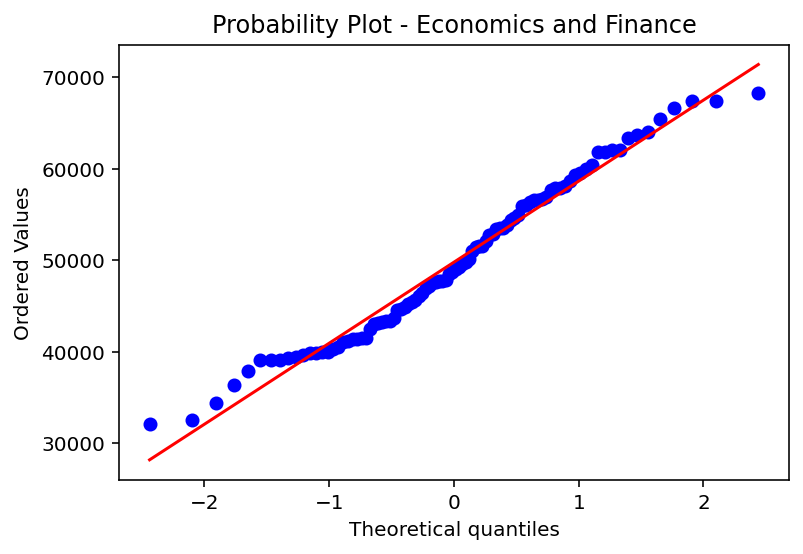

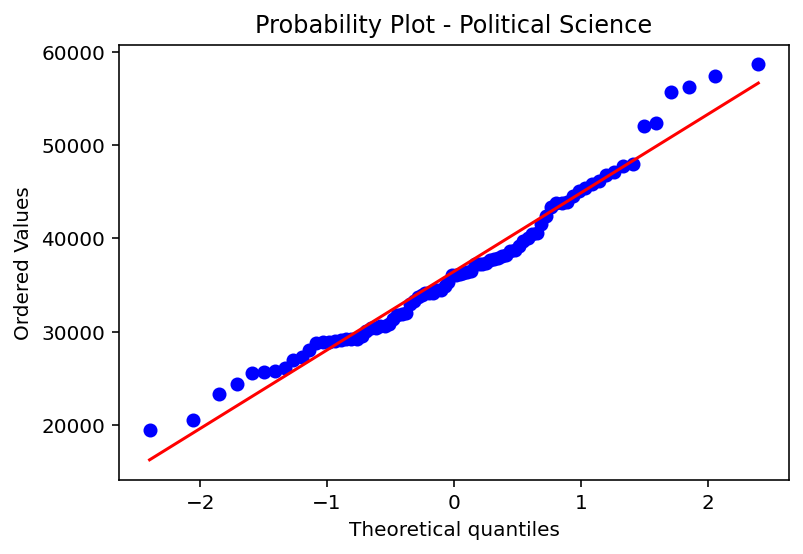

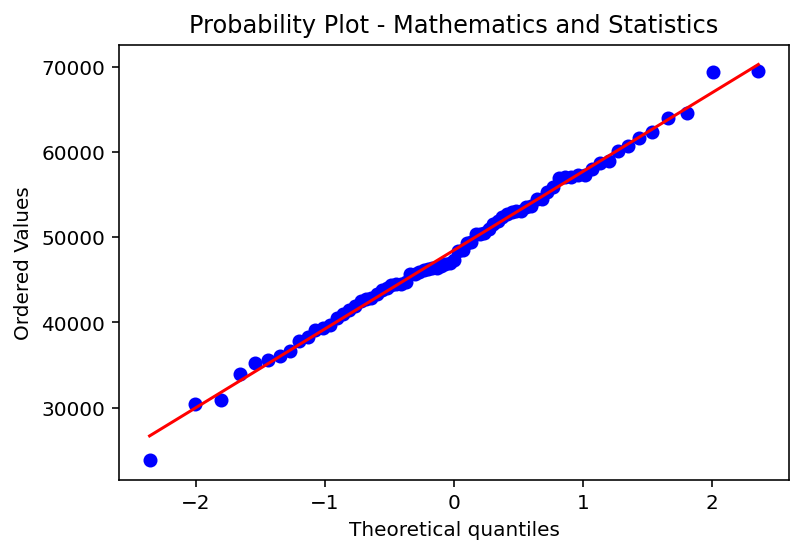

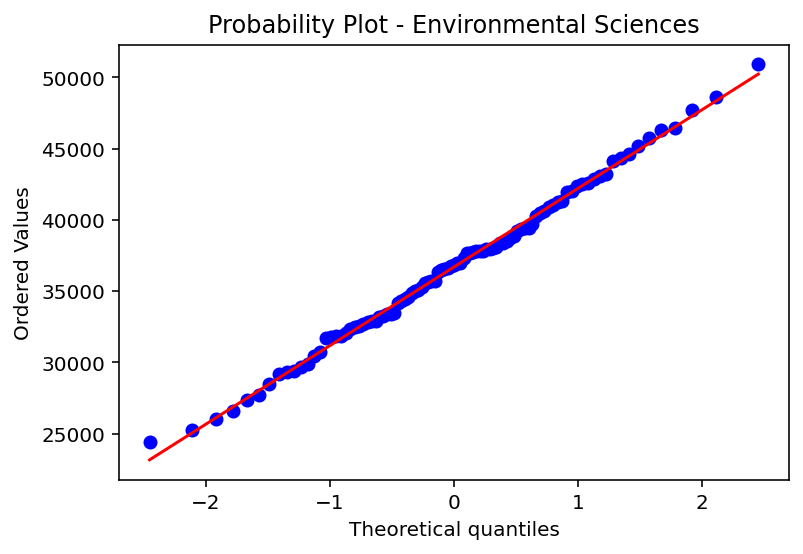

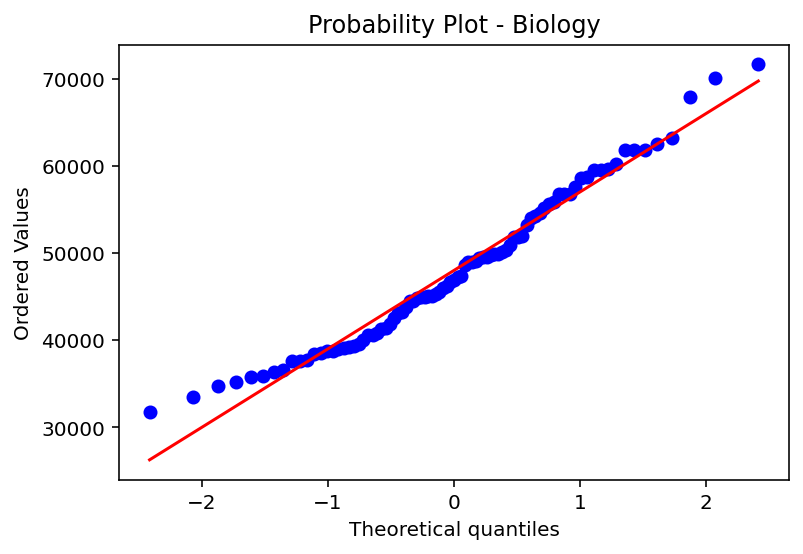

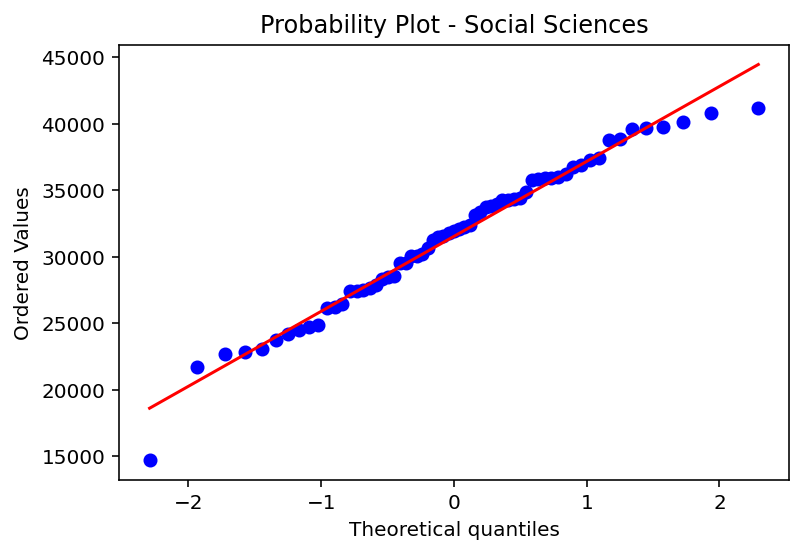

In [22]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['major'].unique()
for major in unique_majors:
    stats.probplot(sample_df[sample_df['major'] == major]['salary'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [23]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_df.groupby('major').std().max() / sample_df.groupby('major').std().min()
ratio

salary    1.669921
dtype: float64

In [24]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.41841e+10,5,4.83682e+09,77.408,1.11022e-16,2.59218
Within Groups,3.08674e+10,494,6.24847e+07,,,
Total,5.50515e+10,499,1.10324e+08,,,


In [25]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77.40803685167364  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77.40803685167364  and critical value is: 2.592178494905
Null Hypothesis is rejected.


## References

[1] Tutorialspoint.com. 2021. SciPy Tutorial. [online] Available at: <https://www.tutorialspoint.com/scipy/index.htm> [Accessed 21 October 2021].

[2] Yudha Wijaya, C., 2014. 3 Top Python Packages to Learn Statistic for Data Scientist. [online] Medium. Available at: <https://towardsdatascience.com/3-top-python-packages-to-learn-statistic-for-data-scientist-d753b76e6099> [Accessed 21 October 2021].

[3] Programming Review. 2021. Python Scipy Examples — Programming Review. [online] Available at: <https://programming-review.com/python/scipy-examples> [Accessed 21 October 2021].

[4] Biswas, D., 2021. Best Python Libraries For Data Science In 2021. [online] Analytics India Magazine. Available at: <https://analyticsindiamag.com/best-python-libraries-for-data-science-in-2021/> [Accessed 21 October 2021].

[5] L, J., 2021. SciPy Tutorial: How to Get Started With SciPy. [online] Medium. Available at: <https://liu-111.medium.com/scipy-tutorial-how-to-get-started-with-scipy-e4737000d77c> [Accessed 21 October 2021].

[6] Olson, R., 2021. Statistical analysis made easy in Python | Dr. Randal S. Olson. [online] Dr. Randal S. Olson | Musings of a data tinkerer. Available at: <http://www.randalolson.com/2012/08/06/statistical-analysis-made-easy-in-python/> [Accessed 21 October 2021].

[7] Scipy.org. 2021. Documentation — SciPy.org. [online] Available at: <https://www.scipy.org/docs.html> [Accessed 21 October 2021].

[8] Varoquaux, V., 2021. 1.6. Scipy : high-level scientific computing — Scipy lecture notes. [online] Scipy-lectures.org. Available at: <http://scipy-lectures.org/intro/scipy.html> [Accessed 21 October 2021].

[9] Nair, P., 2021. Simple Statistics with SciPy. [online] Comfort at 1 AU. Available at: <https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/> [Accessed 21 October 2021].

[10] Virtanen, P., 2020. SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. [online] Research Gate. Available at: <https://www.researchgate.net/publication/339008987_SciPy_10_fundamental_algorithms_for_scientific_computing_in_Python> [Accessed 21 October 2021].

[11] Gomes, S., 2021. [online] Available at: <https://deeptechbytes.com/most-popular-data-scihttps://deeptechbytes.com/most-popular-data-science-python-libraries-for-machine-and-deep-learning/ence-python-libraries-for-machine-and-deep-learning/> [Accessed 27 October 2021].